# Sentiment Analysis of Zomato Restaurant Reviews


The purpose of this analysis is to build a prediction model to predict whether a review on the restaurant is positive or negative. To do so, we will work on Restaurant Review dataset, we will load it into predicitve algorithms Multinomial Naive Bayes, Bernoulli Naive Bayes , Logistic Regression
and Support Vector Machine. In the end, we hope to find a "best" model for predicting the review's sentiment.

Dataset: Restaurant_Reviews.tsv is a dataset from Kaggle datasets which consists of 1000 reviews on a restaurant.

To build a model to predict if review is positive or negative, following steps are performed.

    Importing Dataset
    Preprocessing Dataset
    Vectorization
    Training and Classification
    Analysis Conclusion


### Importing Dataset

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
# displaying  1st 10 values  
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [4]:
# displaying last 10 values 
dataset.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
# to find no of observation presesnt in our dataset 
dataset.shape

(1000, 2)

In [6]:
# checking if there is any null value. 
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

### Preprocessing Dataset

In [7]:
no_of_0 = dataset['Liked'].value_counts()[0]
no_of_1 = dataset['Liked'].value_counts()[1]

print("No of customers who disliked the food" ,no_of_0)
print("No of customers who liked the food" ,no_of_1)


No of customers who disliked the food 500
No of customers who liked the food 500


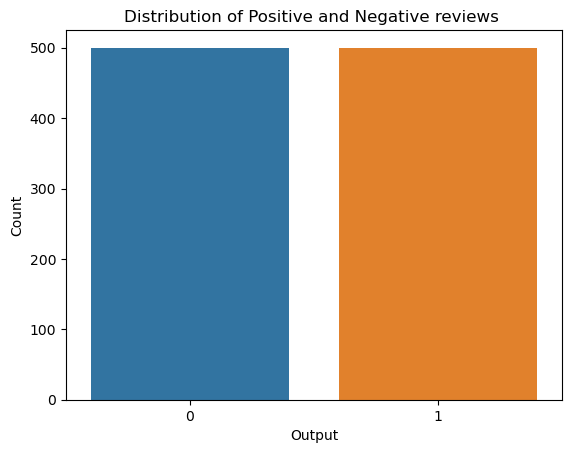

In [8]:
import seaborn as sns
sns.countplot(data=dataset, x='Liked')
# Add labels and title
plt.xlabel('Output')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative reviews ')
# Show the plot
plt.show()



**re**: Provides regular expression operations for pattern matching and text manipulation.

**nltk**: Natural Language Toolkit library that offers various tools and resources for natural language processing tasks.

**nltk.corpus** : provides a collection of corpus resources, include various types of texts, such as books, news articles, movie reviews, and more used for NLP tasks like text classification, sentiment analysis, and language modeling.

**stopwords**: Provides a list of commonly used stopwords (e.g., "the", "is", "and") that can be filtered out from text data.

**nltk.stem.porter.PorterStemmer**: Implements the Porter stemming algorithm, which reduces words to their base or root form (e.g., "running" to "run") to improve text analysis and processing.

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0, 1000):
 review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
 review = review.lower()
 review = review.split()
 ps = PorterStemmer()
 review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
 review = ' '.join(review)
 corpus.append(review)


In [10]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anubhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
corpus 

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

#### Using Word Cloud. 
It is a data visualization technique used to depict text in such a way that,
the more frequent words appear enlarged as compared to less frequent words.

In [12]:

from wordcloud import WordCloud
corpus = []

for i in range(0, 1000):
 # Only include alphabets a-z or A-Z. Removing commas or semicolons or any other punctuation.
 zomato_ratings = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    
 # Convert all reviews into lowercase to avoid ambiguity. 'The' and 'THE' are treated the same
 zomato_ratings = zomato_ratings.lower()
 zomato_ratings = zomato_ratings.split()

 ps = PorterStemmer()
 stop_words = stopwords.words('english')
 stop_words.remove('not')

 zomato_ratings = [ps.stem(word) for word in zomato_ratings if word not in set(stop_words)]
 zomato_ratings = ' '.join(zomato_ratings)
 corpus.append(zomato_ratings)




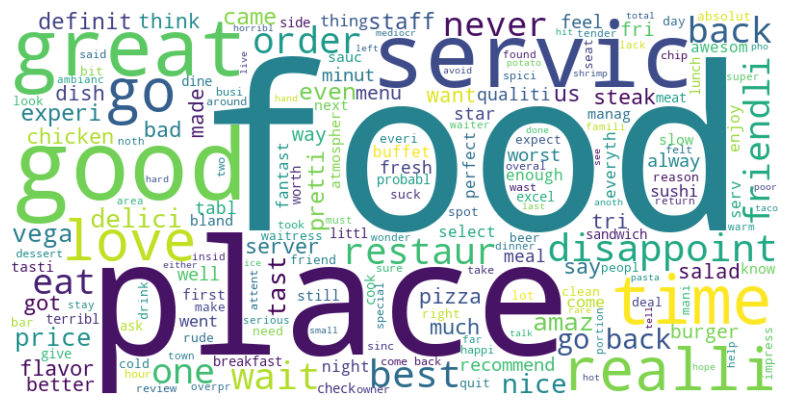

In [13]:
# Combine all the words into a single string
text = ' '.join(corpus)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**The Counter class from the collections module** 

Is used to count the occurrences of elements in a collection.  It provides a convenient and efficient way to get the frequency distribution of items in a list, string, or any other iterable object. The Counter class creates a dictionary where the elements are stored as keys, and their counts are stored as values.

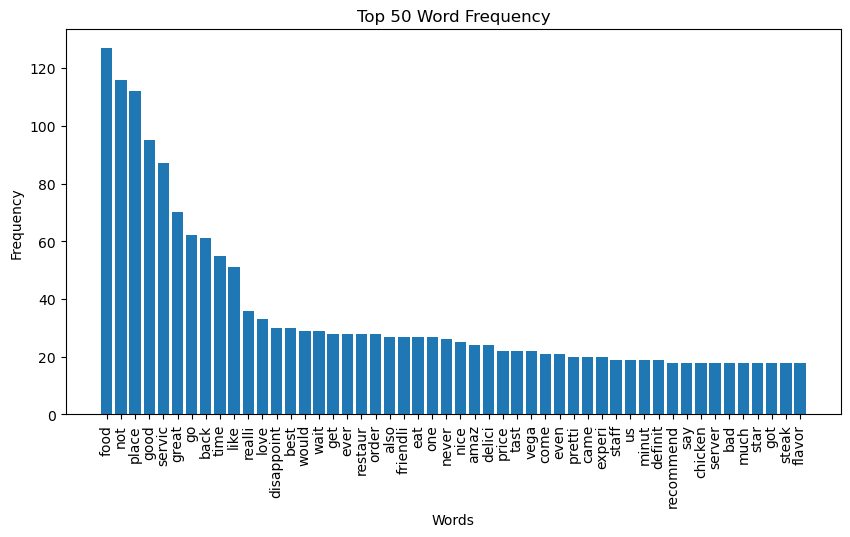

In [14]:
# Create a bar plot from the top 50 word frequencies
from collections import Counter
word_freq = Counter(text.split())
top_50_words = dict(word_freq.most_common(50))
words, freqs = zip(*top_50_words.items())
plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Word Frequency')
plt.show()

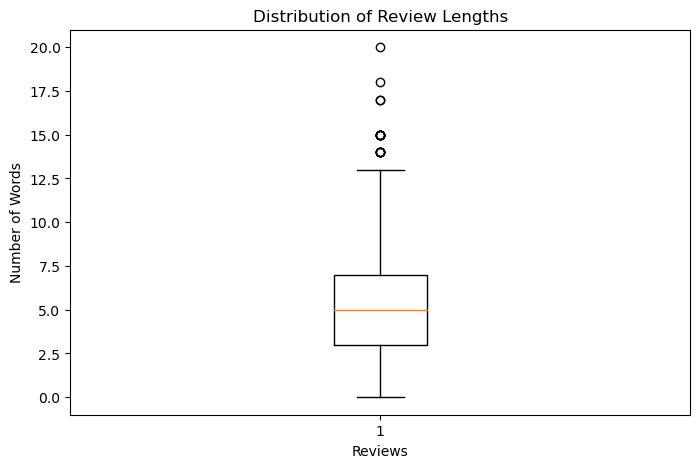

In [15]:
# The box plot is used to visualize the distribution of review lengths.
review_lengths = [len(review.split()) for review in corpus]
plt.figure(figsize=(8, 5))
plt.boxplot(review_lengths)
plt.xlabel('Reviews')
plt.ylabel('Number of Words')
plt.title('Distribution of Review Lengths')
plt.show()

### Vectorization

From the cleaned dataset, potential features are extracted and are converted to numerical format. The vectorization techniques are used to convert textual data to numerical format. Using vectorization, a matrix is created where each column represents a feature and each row represents an individual review.


In [16]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values


#### Splitting the dataset into Train and Test data

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y_train

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,

### Training and Classification

#### Classification Algorithms:

Algorithms like Decision tree, Support Vector Machine, Logistic Regression, Naive Bayes were implemented and on comparing the evaluation metrics two of the algorithms gave better predictions than others.

   **1)  Multinomial Naive Bayes**
   
   **2)  Bernoulli Naive Bayes**
   
   **3)  Logistic Regression**
   
   **4)  Support Vector Machine**

### Multinomial Naive Bayes

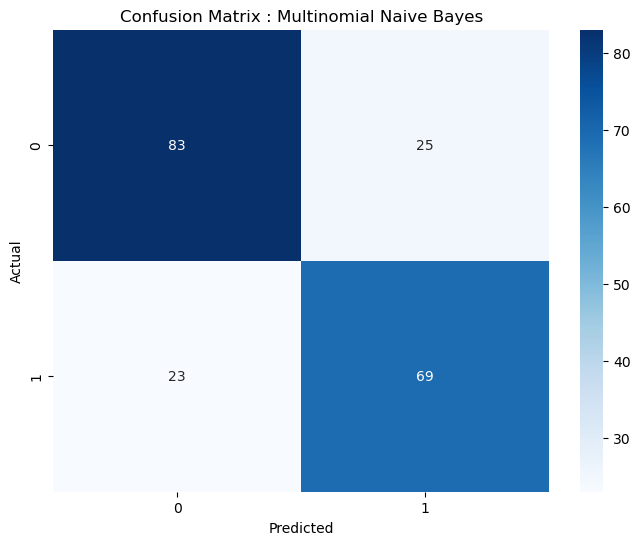

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Multinomial NB
from sklearn.naive_bayes import MultinomialNB

# Fitting Naive Bayes to the Training set
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix : Multinomial Naive Bayes')
plt.show()



#### Evaluation metrics

In [57]:

# Accuracy, Precision, and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n")
print("Accuracy: ", round(score1 * 100, 2), "%")
print("Precision: ", round(score2, 2))
print("Recall: ", round(score3, 2))

Confusion Matrix:
 [[83 25]
 [23 69]]


Accuracy:  76.0 %
Precision:  0.73
Recall:  0.75


#### Cross validation 

While accuracy gives a single value representing the model's performance on the given dataset,
cross-validation provides a more comprehensive evaluation by considering the model's performance 
across multiple subsets of data. Cross-validation helps in assessing the model's robustness and 
ability to generalize to new data.


In [58]:
from sklearn.model_selection import cross_validate

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

# Extract the mean scores for each metric

mean_accuracy = np.mean(cv_results['test_accuracy']).round(4)
mean_precision = np.mean(cv_results['test_precision_macro']).round(4)
mean_recall = np.mean(cv_results['test_recall_macro']).round(4)
mean_f1 = np.mean(cv_results['test_f1_macro']).round(4)

# Print the mean scores
print("Cross-Validation Results (Mean Scores):")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-score:", mean_f1)


Cross-Validation Results (Mean Scores):
Accuracy: 0.772
Precision: 0.7729
Recall: 0.772
F1-score: 0.7718


### Bernoulli Naive Bayes

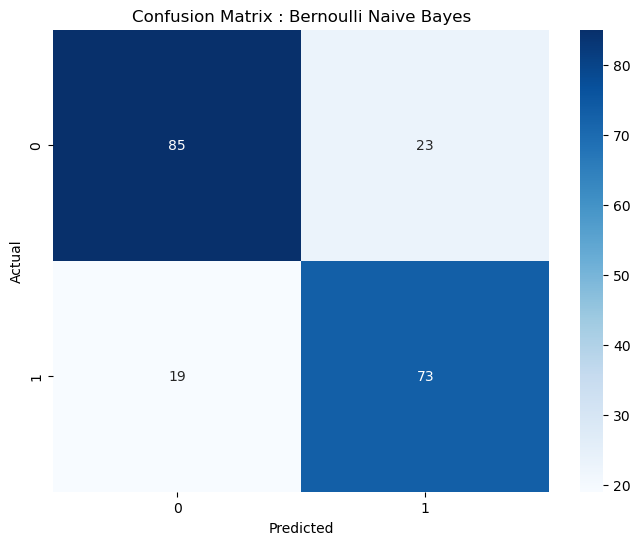

In [22]:
from sklearn.naive_bayes import BernoulliNB


# Fitting Naive Bayes to the Training set
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix : Bernoulli Naive Bayes')
plt.show()


#### Evaluation metrics

In [23]:
# Accuracy, Precision, and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n")
print("Accuracy: ", round(score1 * 100, 2), "%")
print("Precision: ", round(score2, 2))
print("Recall: ", round(score3, 2))

Confusion Matrix:
 [[85 23]
 [19 73]]


Accuracy:  79.0 %
Precision:  0.76
Recall:  0.79


#### Cross validation

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import BernoulliNB

# Bernoulli NB
classifier = BernoulliNB(alpha=0.8)

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

# Extract the mean scores for each metric
mean_accuracy = cv_results['test_accuracy'].mean().round(4)
mean_precision = cv_results['test_precision_macro'].mean().round(4)
mean_recall = cv_results['test_recall_macro'].mean().round(4)
mean_f1 = cv_results['test_f1_macro'].mean().round(4)


# Print the mean scores
print("Cross-Validation Results (Mean Scores):")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-score:", mean_f1)

Cross-Validation Results (Mean Scores):
Accuracy: 0.773
Precision: 0.7744
Recall: 0.773
F1-score: 0.7727


### Support Vector Machine

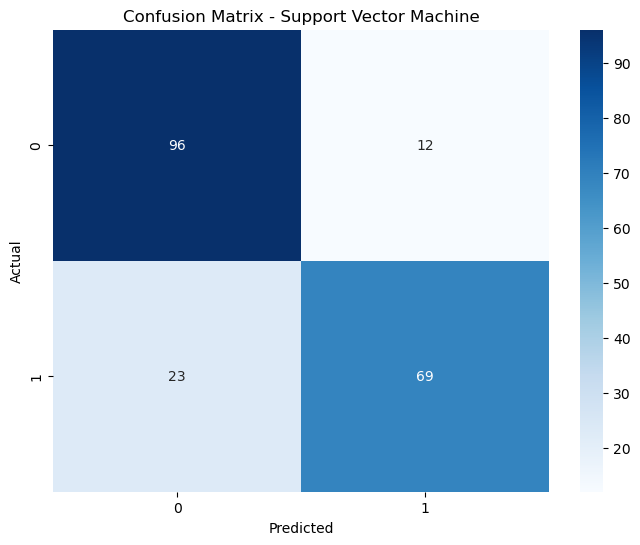

In [25]:
from sklearn.svm import SVC
import seaborn as sns

# Support Vector Machine
# kernel: linear, rbf(default if no parameter), poly, sigmoid.
classifier = SVC(kernel='rbf', C=1.0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')  # Add the classifier name
plt.show()


#### Evaluation metrics


In [63]:
# Accuracy, Precision, and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n")
print("Accuracy: ", round(score1 * 100, 2), "%")
print("Precision: ", round(score2, 2))
print("Recall: ", round(score3, 2))

Confusion Matrix:
 [[96 12]
 [23 69]]


Accuracy:  82.5 %
Precision:  0.85
Recall:  0.75


#### Cross validation

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate


# Support Vector Machine
# kernel: linear, rbf(default if no parameter), poly, sigmoid.
classifier = SVC(kernel='rbf', C=1.0)

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

# Extract the mean scores for each metric
mean_accuracy = cv_results['test_accuracy'].mean().round(4)
mean_precision = cv_results['test_precision_macro'].mean().round(4)
mean_recall = cv_results['test_recall_macro'].mean().round(4)
mean_f1 = cv_results['test_f1_macro'].mean().round(4)

# Print the mean scores
print("Cross-Validation Results (Mean Scores):")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-score:", mean_f1)

Cross-Validation Results (Mean Scores):
Accuracy: 0.802
Precision: 0.8123
Recall: 0.802
F1-score: 0.8002


### ROC curve

The ROC curve allows us to assess the performance of our classification model by examining how well it distinguishes between positive and negative instances. A model with a higher ROC curve (closer to the top-left corner) generally indicates better classification performance
A higher AUC (Area under curve )indicates better classification performance, with a value of 1 representing a perfect classifier.

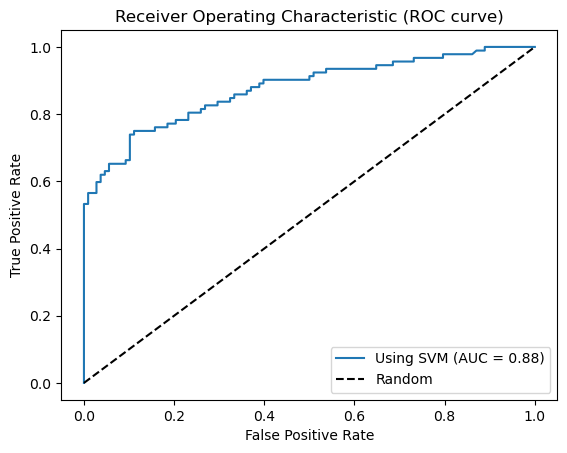

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# preprocessed text data stored in x and corresponding labels in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Train an SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Using SVM (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC curve)')
plt.legend(loc='lower right')
plt.show()


### Logistic Regression

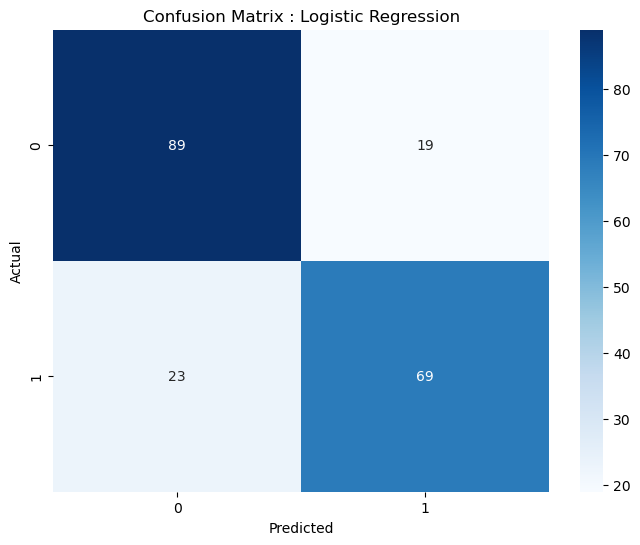

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Support Vector Machine
classifier = LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix : Logistic Regression')
plt.show()


#### Evaluation metrics

In [67]:
# Accuracy, Precision, and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\n")
print("Accuracy: ", round(score1 * 100, 2), "%")
print("Precision: ", round(score2, 2))
print("Recall: ", round(score3, 2))

Confusion Matrix:
 [[89 19]
 [23 69]]


Accuracy:  79.0 %
Precision:  0.78
Recall:  0.75


#### Cross validation 

In [68]:

from sklearn.model_selection import cross_validate


# using logistic regression
classifier = LogisticRegression(C=1.5)

# Perform cross-validation
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)

# Extract the mean scores for each metric
mean_accuracy = cv_results['test_accuracy'].mean().round(4)
mean_precision = cv_results['test_precision_macro'].mean().round(4)
mean_recall = cv_results['test_recall_macro'].mean().round(4)
mean_f1 = cv_results['test_f1_macro'].mean().round(4)


# Print the mean scores
print("Cross-Validation Results (Mean Scores):")
print("Accuracy:", mean_accuracy)
print("Precision:", mean_precision)
print("Recall:", mean_recall)
print("F1-score:", mean_f1)

Cross-Validation Results (Mean Scores):
Accuracy: 0.79
Precision: 0.7941
Recall: 0.79
F1-score: 0.7893


### Roc Curve 

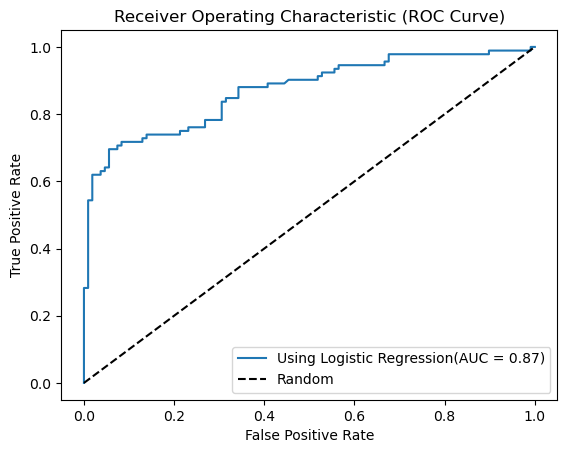

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# The preprocessed text data stored in X and corresponding labels in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

#Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Using Logistic Regression(AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.show()

## Analysis and Conclusion

In conclusion, our study focused on sentiment analysis of restaurant reviews using various machine learning algorithms. The algorithms evaluated included Multinomial Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine (SVM), and Logistic Regression.

After assessing the performance of these algorithms based on accuracy, precision, and recall and F1 score, we can draw the following conclusions:

#### Using Multinomial Naive Bayes


    Accuracy of prediction : 77.2%
    
    Precision of prediction: 0.773
    
    Recall of prediction: 0.772
    
    F1-score of prediction : 0.771


#### Using Bernoulli Naive Bayes


    Accuracy of prediction : 77.3%
    
    Precision of prediction: 0.774
    
    Recall of prediction: 0.773
    
    F1-score of prediction : 0.773



#### Using Support Vector Machine 
   
  **(Rbf kernel gives the best result)**
    
    Accuracy of prediction : 80.19%
    
    Precision of prediction: 0.8123
    
    Recall of prediction: 0.802
    
    F1-score of prediction : 0.80
    
#### Using Logistic Regression

    
    Accuracy of prediction : 79%
    
    Precision of prediction: 0.794
    
    Recall of prediction: 0.79
    
    F1-score of prediction : 0.789


From the above results, Support Vector Machine  performs slightly better compared to the other methods, with an accuracy of 80.19 %. Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression  also show competitive performance, with accuracies of 77.2%, 77.3%, and 79% respectively